In [1]:
import numpy as np
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mohansacharya/graduate-admissions",
"Admission_Predict.csv"
)

C:\Users\Hp\AppData\Local\Temp\ipykernel_8584\2719614136.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 12.6k/12.6k [00:00<00:00, 6.46MB/s]


In [2]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# df.shape
# df.info()
# df.duplicated().sum()  # Check for duplicate rows
# df.describe()  # Get summary statistics of the dataset/

np.int64(0)

In [7]:
df.drop(columns=['Serial No.'], inplace=True)  # Drop the 'Serial No.' column

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
X = df.drop(columns=['Chance of Admit '])  # Features
Y = df['Chance of Admit ']  # Target variable

In [11]:
X, Y

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 0          337          118                  4  4.5   4.5  9.65         1
 1          324          107                  4  4.0   4.5  8.87         1
 2          316          104                  3  3.0   3.5  8.00         1
 3          322          110                  3  3.5   2.5  8.67         1
 4          314          103                  2  2.0   3.0  8.21         0
 ..         ...          ...                ...  ...   ...   ...       ...
 395        324          110                  3  3.5   3.5  9.04         1
 396        325          107                  3  3.0   3.5  9.11         1
 397        330          116                  4  5.0   4.5  9.45         1
 398        312          103                  3  3.5   4.0  8.78         0
 399        333          117                  4  5.0   4.0  9.66         1
 
 [400 rows x 7 columns],
 0      0.92
 1      0.76
 2      0.72
 3      0.80
 4      0.65
        

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [25]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [38]:
his = model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.0000e+00 - loss: 0.2305 - val_accuracy: 0.0000e+00 - val_loss: 0.2020
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 0.2103 - val_accuracy: 0.0000e+00 - val_loss: 0.1919
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.2010 - val_accuracy: 0.0000e+00 - val_loss: 0.1815
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 0.1766 - val_accuracy: 0.0000e+00 - val_loss: 0.1698
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.1711 - val_accuracy: 0.0000e+00 - val_loss: 0.1620
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 0.1500 - val_accuracy: 0.0000e+00 - val_loss: 0.1526
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.1619 - val_accuracy: 0.0000e+00 - val_loss: 0.1442
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+

In [41]:
y_pred = model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [42]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
print(f"R^2 Score: {r2:.4f}")

R^2 Score: -0.0310


Text(0.5, 0, 'Epochs')

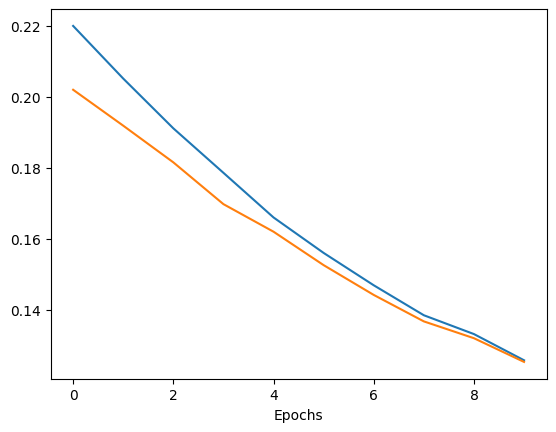

In [43]:
import matplotlib.pyplot as plt
plt.plot(his.history['loss'], label='Training Loss')
plt.plot(his.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

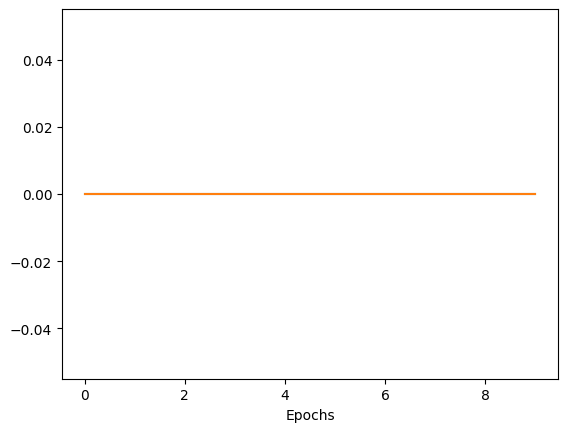

In [44]:
plt.plot(his.history['accuracy'], label='Training Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')